In [19]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import scipy
import numpy as np

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OJWiz15BShFHlax31OVUh-3Y0nE3kRZleXlmZ5HK-NSX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-gb.cloud-object-storage.appdomain.cloud')

def load_stream(object_key):
    # load data of type "application/octet-stream" into a botocore.response.StreamingBody object.
    # Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
    # ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
    # pandas documentation: http://pandas.pydata.org/
    bucket = 'uavteams24-donotdelete-pr-d90cszuedlklrl'

    return cos_client.get_object(Bucket=bucket, Key=object_key)['Body']



In [2]:
import io
import pandas as pd

bucket_name ='uavteams24-donotdelete-pr-d90cszuedlklrl'

# Specify a single CSV to check
csv_key = 'CSVs/F0_SV0_SP1_t1_D1_R1.csv'  # replace with any CSV from the folder

# Download CSV from COS
csv_stream = cos_client.get_object(Bucket=bucket_name, Key=csv_key)['Body'].read()

# Load CSV into pandas DataFrame
df = pd.read_csv(io.StringIO(csv_stream.decode('utf-8')))

# Print basic info
print(f"File: {csv_key}")
print(f"Shape: {df.shape}")
print(f"First 5 rows:\n{df.head()}")
print(f"Approx. size: {len(csv_stream)/1024:.2f} KB")

response = cos_client.list_objects_v2(Bucket=bucket_name, Prefix='CSVs/')
count = 0
for obj in response.get('Contents', []):
    count +=1
print(count)

File: CSVs/F0_SV0_SP1_t1_D1_R1.csv
Shape: (56, 87837)
First 5 rows:
          0         1         2         3         4         5         6  \
0  0.000000  0.001000  0.002000  0.003000  0.004000  0.005000  0.006000   
1  0.000000 -0.000029 -0.000023 -0.000017 -0.000011 -0.000014 -0.000017   
2  0.000000  0.000041  0.000042  0.000043  0.000044  0.000058  0.000071   
3  0.000000 -0.000195 -0.000103 -0.000011  0.000082  0.000101  0.000121   
4 -0.025966 -0.025966 -0.025966 -0.025458 -0.024563 -0.023383 -0.022136   

          7         8         9  ...      87827      87828      87829  \
0  0.007000  0.008000  0.009000  ...  87.827000  87.828000  87.829000   
1 -0.000024 -0.000031 -0.000038  ...  -0.021012  -0.021027  -0.021051   
2  0.000088  0.000105  0.000122  ...   0.009294   0.009316   0.009374   
3  0.000128  0.000135  0.000142  ...   2.886666   2.886671   2.886676   
4 -0.020855 -0.019617 -0.018429  ...  -0.013405  -0.012366  -0.011387   

       87830      87831      87832      87

In [3]:
import re

# Bucket COS
bucket_name = 'uavteams24-donotdelete-pr-d90cszuedlklrl'

# List all objects in the CSVs folder
response = cos_client.list_objects_v2(Bucket=bucket_name, Prefix='CSVs/')

# Loop through objects and delete those that have "reduced" in their name
for obj in response.get('Contents', []):
    csv_key = obj['Key']
    if 'reduced' in csv_key and csv_key.endswith('.csv'):
        print(f"Deleting file: {csv_key}")
        cos_client.delete_object(Bucket=bucket_name, Key=csv_key)

print("Deletion complete.")


Deleting file: CSVs/F0_SV0_SP1_t1_D1_R1_reduced.csv
Deleting file: CSVs/F0_SV0_SP1_t1_D1_R2_reduced.csv
Deleting file: CSVs/F0_SV0_SP1_t1_D1_R3_reduced.csv
Deleting file: CSVs/F0_SV0_SP1_t1_D2_reduced.csv
Deletion complete.


In [4]:
import re
import random

# Bucket COS
bucket_name = 'uavteams24-donotdelete-pr-d90cszuedlklrl'

# Lister tous les objets dans le dossier CSVs
response = cos_client.list_objects_v2(Bucket=bucket_name, Prefix='CSVs/')

parsed_files = []

# Parcours des fichiers et extraction des infos
for obj in response.get('Contents', []):
    csv_key = obj['Key']
    if csv_key.endswith('.csv'):
        match = re.match(r'CSVs/F(\d+)_SV(\d+)_.*\.csv', csv_key)
        if match:
            fault = int(match.group(1))
            severity = int(match.group(2))
            parsed_files.append([csv_key, fault, severity])

print(f"Total CSV parsed: {len(parsed_files)}")

# Affiche 10 fichiers au hasard pour vérification
for f in random.sample(parsed_files, 10):
    print(f)

Total CSV parsed: 130
['CSVs/F3_SV1_SP1_t5.csv', 3, 1]
['CSVs/F1_SV3_SP1_t3.csv', 1, 3]
['CSVs/F3_SV1_SP2_t3.csv', 3, 1]
['CSVs/F3_SV3_SP1_t5.csv', 3, 3]
['CSVs/F2_SV2_SP2_t1.csv', 2, 2]
['CSVs/F0_SV0_SP1_t3_D1_R3.csv', 0, 0]
['CSVs/F0_SV0_SP2_t5_D1_R3.csv', 0, 0]
['CSVs/F1_SV1_SP1_t4.csv', 1, 1]
['CSVs/F0_SV0_SP1_t2_D1_R1.csv', 0, 0]
['CSVs/F2_SV1_SP2_t2.csv', 2, 1]


In [5]:
import pandas as pd
from io import BytesIO

bucket_name = 'uavteams24-donotdelete-pr-d90cszuedlklrl'

for csv_key, fault, severity in parsed_files:
# Skip files with 'D' in the filename
    if 'Dad' in csv_key:
        continue

    try:
        # Read CSV from COS
        obj = cos_client.get_object(Bucket=bucket_name, Key=csv_key)
        df = pd.read_csv(obj['Body'])
    
        # Keep 1 out of every 100 columns (timestep)
        df_reduced = df.iloc[:, ::20]
    
        # Save reduced CSV back to COS
        new_key = csv_key.replace('.csv', '_reduced.csv')
        csv_buffer = BytesIO()
        df_reduced.to_csv(csv_buffer, index=False)
        csv_buffer.seek(0)
        cos_client.put_object(Bucket=bucket_name, Key=new_key, Body=csv_buffer.getvalue())
    
    except Exception as e:
        print(f"Failed to process {csv_key}: {e}")

In [6]:
import re
import random

# Bucket COS
bucket_name = 'uavteams24-donotdelete-pr-d90cszuedlklrl'

# Lister tous les objets dans le dossier CSVs
response = cos_client.list_objects_v2(Bucket=bucket_name, Prefix='CSVs/')

parsed_files = []

# Parcours des fichiers et extraction des infos
for obj in response.get('Contents', []):
    csv_key = obj['Key']
    # Apply only to files that have "reduced" in their name
    if csv_key.endswith('.csv') and 'reduced' in csv_key:
        match = re.match(r'CSVs/F(\d+)_SV(\d+)_.*\.csv', csv_key)
        if match:
            fault = int(match.group(1))
            severity = int(match.group(2))
            parsed_files.append([csv_key, fault, severity])

print(f"Total reduced CSV parsed: {len(parsed_files)}")

# Affiche 10 fichiers au hasard pour vérification
for f in random.sample(parsed_files, min(10, len(parsed_files))):
    print(f)

Total reduced CSV parsed: 130
['CSVs/F1_SV2_SP2_t1_reduced.csv', 1, 2]
['CSVs/F1_SV2_SP2_t4_reduced.csv', 1, 2]
['CSVs/F3_SV2_SP1_t2_reduced.csv', 3, 2]
['CSVs/F3_SV1_SP1_t4_reduced.csv', 3, 1]
['CSVs/F1_SV1_SP1_t4_reduced.csv', 1, 1]
['CSVs/F2_SV1_SP2_t3_reduced.csv', 2, 1]
['CSVs/F2_SV3_SP2_t4_reduced.csv', 2, 3]
['CSVs/F3_SV2_SP2_t3_reduced.csv', 3, 2]
['CSVs/F1_SV2_SP1_t2_reduced.csv', 1, 2]
['CSVs/F1_SV1_SP1_t5_reduced.csv', 1, 1]


In [7]:
import re
import random

# Define bucket and prefix
bucket_name = 'uavteams24-donotdelete-pr-d90cszuedlklrl'
prefix = 'CSVs/'

# List all objects in the bucket folder
response = cos_client.list_objects_v2(Bucket=bucket_name, Prefix=prefix)

# Prepare list for reduced files
reduced_files = []

# Parse filenames directly from the bucket
for obj in response.get('Contents', []):
    key = obj['Key']
    if key.endswith('.csv') and 'reduced' in key:
        match = re.search(r'F(\d+)_SV(\d+)_', key)
        if match:
            fault = int(match.group(1))
            severity = int(match.group(2))
            reduced_files.append([key, fault, severity])

# Print summary
print(f"Number of reduced CSVs found: {len(reduced_files)}\n")

# Show a few random examples
for key, fault, severity in random.sample(reduced_files, min(5, len(reduced_files))):
    print(f"File: {key} | Fault: F{fault} | Severity: SV{severity}")


Number of reduced CSVs found: 130

File: CSVs/F0_SV0_SP1_t1_D1_R2_reduced.csv | Fault: F0 | Severity: SV0
File: CSVs/F2_SV3_SP2_t4_reduced.csv | Fault: F2 | Severity: SV3
File: CSVs/F0_SV0_SP2_t4_D1_R2_reduced.csv | Fault: F0 | Severity: SV0
File: CSVs/F3_SV2_SP2_t1_reduced.csv | Fault: F3 | Severity: SV2
File: CSVs/F3_SV2_SP1_t3_reduced.csv | Fault: F3 | Severity: SV2


In [9]:
import numpy as np
import pandas as pd
from io import BytesIO
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ======== Step 1. Prepare data from COS ========
X, y_fault, y_severity = [], [], []

for key, fault, severity in reduced_files:
    obj = cos_client.get_object(Bucket=bucket_name, Key=key)
    df = pd.read_csv(obj['Body'])
    
    # Replace inf/NaN and clean
    df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='any')
    
    # Transpose so timesteps = columns, features = rows
    df_T = df.T  # now shape is (timesteps, features)
    
    # Normalize features per variable
    data = StandardScaler().fit_transform(df_T.values)
    
    X.append(data)
    y_fault.append(fault - 1)
    y_severity.append(severity - 1)

# Pad sequences (some flights are longer)
X_padded = pad_sequences(X, dtype='float32', padding='post', value=0.0)

X_padded = np.array(X_padded)
y_fault = np.array(y_fault)
y_severity = np.array(y_severity)

print(f"Input shape: {X_padded.shape} (samples, timesteps, features)")

# ======== Step 2. Split & Encode Labels ========
X_train, X_val, y_fault_train, y_fault_val, y_sev_train, y_sev_val = train_test_split(
    X_padded, y_fault, y_severity, test_size=0.2, random_state=42
)

num_faults = len(np.unique(y_fault))
num_severities = len(np.unique(y_severity))

y_fault_train = to_categorical(y_fault_train, num_faults)
y_fault_val = to_categorical(y_fault_val, num_faults)
y_sev_train = to_categorical(y_sev_train, num_severities)
y_sev_val = to_categorical(y_sev_val, num_severities)

# ======== Step 3. Define Model ========
timesteps = X_padded.shape[1]
features = X_padded.shape[2]

input_layer = layers.Input(shape=(timesteps, features))

# Temporal feature extractor
x = layers.Conv1D(64, 5, activation='relu', padding='same')(input_layer)
x = layers.MaxPooling1D(2)(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=False))(x)
x = layers.Dropout(0.3)(x)

# Two outputs
fault_output = layers.Dense(num_faults, activation='softmax', name='fault_output')(x)
severity_output = layers.Dense(num_severities, activation='softmax', name='severity_output')(x)

model = models.Model(inputs=input_layer, outputs=[fault_output, severity_output])

# ======== Step 4. Compile ========
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss={'fault_output': 'categorical_crossentropy',
          'severity_output': 'categorical_crossentropy'},
    metrics={'fault_output': 'accuracy', 'severity_output': 'accuracy'}
)

model.summary()

# ======== Step 5. Train ========
history = model.fit(
    X_train,
    {'fault_output': y_fault_train, 'severity_output': y_sev_train},
    validation_data=(X_val, {'fault_output': y_fault_val, 'severity_output': y_sev_val}),
    epochs=15,
    batch_size=8
)

# ======== Step 6. Inference ========
def predict_flight(csv_key):
    obj = cos_client.get_object(Bucket=bucket_name, Key=csv_key)
    df = pd.read_csv(obj['Body']).replace([np.inf, -np.inf], np.nan).dropna(axis=1)
    df_T = df.T
    data = StandardScaler().fit_transform(df_T.values)
    data = pad_sequences([data], maxlen=timesteps, padding='post', dtype='float32')
    preds = model.predict(data)
    fault_pred = np.argmax(preds[0])
    severity_pred = np.argmax(preds[1])
    print(f"Predicted Fault: F{fault_pred+1}, Severity: SV{severity_pred+1}")
    return fault_pred+1, severity_pred+1

Input shape: (130, 4983, 56) (samples, timesteps, features)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 4983, 56)]           0         []                            
                                                                                                  
 conv1d_1 (Conv1D)           (None, 4983, 64)             17984     ['input_2[0][0]']             
                                                                                                  
 max_pooling1d_1 (MaxPoolin  (None, 2491, 64)             0         ['conv1d_1[0][0]']            
 g1D)                                                                                             
                                                                                                  
 bidirectional_1 (Bidirecti  (No


Training LSTM model...
Epoch 1/10
9/9 [==============================] - 70s 7s/step - loss: 2.7731 - fault_output_loss: 1.3866 - severity_output_loss: 1.3864 - fault_output_accuracy: 0.2596 - severity_output_accuracy: 0.2692 - val_loss: 2.7715 - val_fault_output_loss: 1.3856 - val_severity_output_loss: 1.3859 - val_fault_output_accuracy: 0.3462 - val_severity_output_accuracy: 0.3462
Epoch 2/10
9/9 [==============================] - 71s 8s/step - loss: 2.7711 - fault_output_loss: 1.3855 - severity_output_loss: 1.3855 - fault_output_accuracy: 0.2885 - severity_output_accuracy: 0.2885 - val_loss: 2.7711 - val_fault_output_loss: 1.3853 - val_severity_output_loss: 1.3859 - val_fault_output_accuracy: 0.3462 - val_severity_output_accuracy: 0.3462
Epoch 3/10
9/9 [==============================] - 71s 8s/step - loss: 2.7676 - fault_output_loss: 1.3841 - severity_output_loss: 1.3834 - fault_output_accuracy: 0.2981 - severity_output_accuracy: 0.2981 - val_loss: 2.7704 - val_fault_output_loss: 1

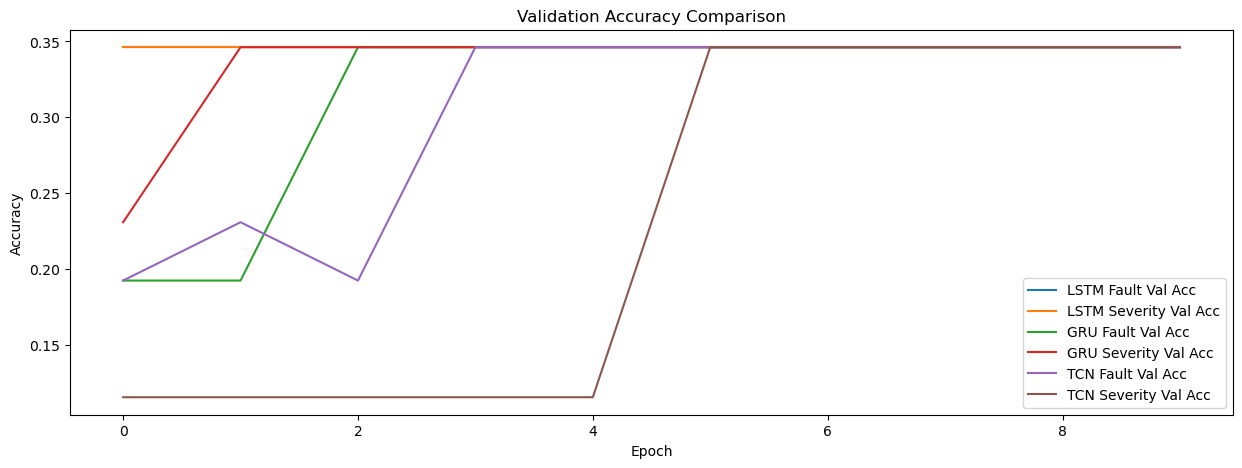

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tcn import TCN  # make sure keras-tcn is installed: pip install keras-tcn

models_dict = {}

# ======== 1. LSTM Model ========
input_layer = layers.Input(shape=(timesteps, features))
x = layers.LSTM(128, return_sequences=True)(input_layer)
x = layers.LSTM(64)(x)
x = layers.Dropout(0.3)(x)
fault_output = layers.Dense(num_faults, activation='softmax', name='fault_output')(x)
severity_output = layers.Dense(num_severities, activation='softmax', name='severity_output')(x)

lstm_model = models.Model(inputs=input_layer, outputs=[fault_output, severity_output])
lstm_model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss={'fault_output':'categorical_crossentropy','severity_output':'categorical_crossentropy'},
    metrics={'fault_output':'accuracy','severity_output':'accuracy'}
)
models_dict['LSTM'] = lstm_model

# ======== 2. GRU Model ========
input_layer = layers.Input(shape=(timesteps, features))
x = layers.GRU(128, return_sequences=True)(input_layer)
x = layers.GRU(64)(x)
x = layers.Dropout(0.3)(x)
fault_output = layers.Dense(num_faults, activation='softmax', name='fault_output')(x)
severity_output = layers.Dense(num_severities, activation='softmax', name='severity_output')(x)

gru_model = models.Model(inputs=input_layer, outputs=[fault_output, severity_output])
gru_model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss={'fault_output':'categorical_crossentropy','severity_output':'categorical_crossentropy'},
    metrics={'fault_output':'accuracy','severity_output':'accuracy'}
)
models_dict['GRU'] = gru_model

# ======== 3. TCN Model ========
input_layer = layers.Input(shape=(timesteps, features))
x = TCN(64, return_sequences=False)(input_layer)
x = layers.Dropout(0.3)(x)
fault_output = layers.Dense(num_faults, activation='softmax', name='fault_output')(x)
severity_output = layers.Dense(num_severities, activation='softmax', name='severity_output')(x)

tcn_model = models.Model(inputs=input_layer, outputs=[fault_output, severity_output])
tcn_model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss={'fault_output':'categorical_crossentropy','severity_output':'categorical_crossentropy'},
    metrics={'fault_output':'accuracy','severity_output':'accuracy'}
)
models_dict['TCN'] = tcn_model

# ======== Train and Compare ========
histories = {}
for name, model in models_dict.items():
    print(f"\nTraining {name} model...")
    history = model.fit(
        X_train,
        {'fault_output': y_fault_train, 'severity_output': y_sev_train},
        validation_data=(X_val, {'fault_output': y_fault_val, 'severity_output': y_sev_val}),
        epochs=10,
        batch_size=12,
        verbose=1
    )
    histories[name] = history

# ======== Plot Accuracy ========
plt.figure(figsize=(15,5))
for name, history in histories.items():
    plt.plot(history.history['val_fault_output_accuracy'], label=f'{name} Fault Val Acc')
    plt.plot(history.history['val_severity_output_accuracy'], label=f'{name} Severity Val Acc')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [20]:
# ======== Step 1. Prepare data from COS with global scaling ========

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Initialize lists
X_raw, y_fault, y_severity = [], [], []

# Load data from COS
for key, fault, severity in reduced_files:
    obj = cos_client.get_object(Bucket=bucket_name, Key=Key)
    df = pd.read_csv(obj['Body'])
    
    # Replace inf/NaN
    df = df.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')
    
    df_T = df.T
    X_raw.append(df_T.values)
    y_fault.append(fault - 1)
    y_severity.append(severity - 1)

# Flatten features across flights for global scaling
all_features = np.vstack(X_raw)
scaler = StandardScaler().fit(all_features)

# Apply scaler and pad sequences
X_scaled = [scaler.transform(x) for x in X_raw]
max_len = max([x.shape[0] for x in X_scaled])
X_padded = pad_sequences(X_scaled, maxlen=max_len, dtype='float32', padding='post', value=0.0)

X_padded = np.array(X_padded)
y_fault = np.array(y_fault)
y_severity = np.array(y_severity)

print(f"Input shape: {X_padded.shape} (samples, timesteps, features)")

# ======== Step 2. Split & Encode Labels ========
X_train, X_val, y_fault_train, y_fault_val, y_sev_train, y_sev_val = train_test_split(
    X_padded, y_fault, y_severity, test_size=0.2, random_state=42, stratify=y_fault
)

num_faults = len(np.unique(y_fault))
num_severities = len(np.unique(y_severity))

y_fault_train = to_categorical(y_fault_train, num_faults)
y_fault_val = to_categorical(y_fault_val, num_faults)
y_sev_train = to_categorical(y_sev_train, num_severities)
y_sev_val = to_categorical(y_sev_val, num_severities)

# ======== Step 3. Compute class weights ========
fault_weights = compute_class_weight(class_weight='balanced', classes=np.arange(num_faults), y=y_fault)
severity_weights = compute_class_weight(class_weight='balanced', classes=np.arange(num_severities), y=y_severity)

class_weight_dict = {
    'fault_output': dict(enumerate(fault_weights)),
    'severity_output': dict(enumerate(severity_weights))
}

# ======== Step 4. Define Model ========
timesteps, features = X_padded.shape[1], X_padded.shape[2]
input_layer = layers.Input(shape=(timesteps, features))

# Temporal feature extractor
x = layers.Conv1D(64, 3, activation='relu', padding='same')(input_layer)
x = layers.Conv1D(64, 3, activation='relu', padding='same')(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(32, return_sequences=False))(x)
x = layers.Dropout(0.4)(x)

# Two outputs
fault_output = layers.Dense(num_faults, activation='softmax', name='fault_output')(x)
severity_output = layers.Dense(num_severities, activation='softmax', name='severity_output')(x)

model = models.Model(inputs=input_layer, outputs=[fault_output, severity_output])

# ======== Step 5. Compile ========
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss={'fault_output': 'categorical_crossentropy', 'severity_output': 'categorical_crossentropy'},
    metrics={'fault_output': 'accuracy', 'severity_output': 'accuracy'}
)

model.summary()

# ======== Step 6. Train ========
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

history = model.fit(
    X_train,
    {'fault_output': y_fault_train, 'severity_output': y_sev_train},
    validation_data=(X_val, {'fault_output': y_fault_val, 'severity_output': y_sev_val}),
    epochs=50,
    batch_size=16,
    class_weight=class_weight_dict,
    callbacks=[reduce_lr, early_stop]
)

# ======== Step 7. Inference Function ========
def predict_flight(csv_key):
    obj = cos_client.get_object(Bucket=bucket_name, Key=csv_key)
    df = pd.read_csv(obj['Body']).replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')
    df_T = df.T
    data = scaler.transform(df_T.values)
    data = pad_sequences([data], maxlen=timesteps, padding='post', dtype='float32')
    
    preds = model.predict(data)
    fault_pred = np.argmax(preds[0])
    severity_pred = np.argmax(preds[1])
    
    print(f"Predicted Fault: F{fault_pred+1}, Severity: SV{severity_pred+1}")
    return fault_pred+1, severity_pred+1


NameError: name 'ibm_api_key_id' is not defined